In [1]:
import graphviz
import pandas as pd


from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 读取数据
df = pd.read_excel("是否打篮球决策.xlsx")

In [5]:
# 探索数据
# 数据信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
ID       7 non-null int64
天气       7 non-null object
温度       7 non-null object
湿度       7 non-null object
刮风       7 non-null object
是否打篮球    7 non-null object
dtypes: int64(1), object(5)
memory usage: 416.0+ bytes
None


In [6]:
# 连续型描述
print(df.describe())

             ID
count  7.000000
mean   4.000000
std    2.160247
min    1.000000
25%    2.500000
50%    4.000000
75%    5.500000
max    7.000000


In [7]:
# 离散型描述,参数是字母 O, 不是0
print(df.describe(include=["O"]))

        天气 温度 湿度 刮风 是否打篮球
count    7  7  7  7     7
unique   3  3  2  2     2
top     晴天  高  高  否     否
freq     3  4  4  4     4


In [8]:
# 输出前5个数据
print(df.head())

   ID  天气 温度 湿度 刮风 是否打篮球
0   1  晴天  高  中  否     否
1   2  晴天  高  中  是     否
2   3  阴天  高  高  否     是
3   4  小雨  高  高  否     是
4   5  小雨  低  高  否     否


In [9]:
# 输出后5个数据
print(df.tail())

   ID  天气 温度 湿度 刮风 是否打篮球
2   3  阴天  高  高  否     是
3   4  小雨  高  高  否     是
4   5  小雨  低  高  否     否
5   6  晴天  中  中  是     是
6   7  阴天  中  高  是     否


In [14]:
# 选择特征数据
features = ["天气", "温度", "湿度", "刮风"]
df_features = df[features]
# 选择结果数据
df_labels = df["是否打篮球"]
# 生成特征值矩阵
dvec = DictVectorizer(sparse=False)
# 新矩阵
df_features = dvec.fit_transform(df_features.to_dict(orient="record"))
print(dvec.feature_names_)
print(df_features)

['刮风=否', '刮风=是', '天气=小雨', '天气=晴天', '天气=阴天', '温度=中', '温度=低', '温度=高', '湿度=中', '湿度=高']
[[1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]]


In [11]:
# 构造决策树ID3
clf = DecisionTreeClassifier(criterion="entropy")
# 决策树训练
clf.fit(df_features, df_labels)
# 决策树预测
pred_labels = clf.predict(df_features)
# 决策树准确率
acc_decision_tree = round(clf.score(df_features, df_labels), 6)
print(acc_decision_tree)

1.0


|--- 温度=低 <= 0.50
|   |--- 天气=小雨 <= 0.50
|   |   |--- 温度=高 <= 0.50
|   |   |   |--- 湿度=中 <= 0.50
|   |   |   |   |--- class: 否
|   |   |   |--- 湿度=中 >  0.50
|   |   |   |   |--- class: 是
|   |   |--- 温度=高 >  0.50
|   |   |   |--- 天气=阴天 <= 0.50
|   |   |   |   |--- class: 否
|   |   |   |--- 天气=阴天 >  0.50
|   |   |   |   |--- class: 是
|   |--- 天气=小雨 >  0.50
|   |   |--- class: 是
|--- 温度=低 >  0.50
|   |--- class: 否



'决策树.pdf'

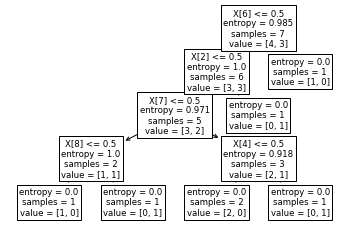

In [16]:
# 绘制决策树
# 1.简单绘制决策树
tree.plot_tree(clf)

# 2.输出决策树, 文字版
r = tree.export_text(decision_tree=clf, feature_names=dvec.feature_names_)
print(r)

# 3.Graphviz形式输出决策树
# pip install graphviz
# 然后官网下载安装包,并将bin路径添加到path中
# 3.1Graphviz形式输出决策树(简单)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("决策树")
# 3.2Graphviz形式输出决策树(视觉优化)
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=dvec.feature_names_,
    class_names=["不打篮球", "打篮球"],
    filled=True,
    rounded=True,
    special_characters=True,
)
# 处理中文乱码
graph = graphviz.Source(dot_data.replace("helvetica", "FangSong"))
# graph.render("决策树")
# 生成路径在当前文件夹内
graph.view("决策树")
# 生成图片
# graph.render(filename="决策树", format="png")